#### 1. Framing the problem. 

### Machine Failure Prediction. 

- Problem statement : 
        Predict the failure of machine Develop a predictive model to anticipate machine failures. 

In [65]:
# library import 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2. Data Gathering

In [66]:
# importing data file 

df = pd.read_csv('data.csv')
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


#### 3. Data Preprocessing/ Data Cleaning

- checking data rows,columns
- checking in short knowledge about data (describe)
- checking for data types of columns. (preprocessing data using replace/label encoder function, )
- checking data contains null values or not and handling nulls if present. 

In [67]:
# Checking row and column numbers.
df.shape

(944, 10)

In [68]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [69]:
df.info()  
# here data is in int format already. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [70]:
df.isna().sum()
# there is no null in dataset. 

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

#### 4. Exploratory Data Analysis (EDA)

- Checking for correlation between features. 
- checking for outliers.

Data Collection:

Gather the dataset from various sources.
Ensure data is in a usable format.

Data Cleaning:

Handle missing values: impute or remove.
Correct inconsistencies and errors.
Remove duplicates.

Data Transformation:

Convert data types as needed.
Normalize or standardize features.
Create new features (feature engineering).

Descriptive Statistics:

Calculate basic statistics (mean, median, mode, standard deviation, etc.).
Summarize data using statistical measures.

Data Visualization:

Plot distributions (histograms, box plots).
Visualize relationships (scatter plots, heatmaps, pair plots).
Use bar charts, line graphs, and pie charts for categorical data.

Correlation Analysis:

Compute correlation coefficients to identify relationships between features.
Use correlation matrices to visualize the strength and direction of correlations.
Outlier Detection:

Identify outliers using statistical methods (e.g., Z-score, IQR method).
Visualize outliers using box plots and scatter plots.

Pattern Recognition:

Detect trends and patterns in the data.
Identify seasonality or cyclical patterns if relevant.

Hypothesis Testing:

Formulate and test hypotheses to validate assumptions about the data.

Data Summarization:

Summarize findings from EDA in a clear and concise manner.
Highlight key insights and potential areas of focus for further analysis.


In [71]:
# finding discreat feature and continuous features. 

continuous_feature = []
descreat_feature = []

for feature in df.columns:
    if len(df[feature].unique())<=10:
        descreat_feature.append(feature)
    else:
        continuous_feature.append(feature)

print(continuous_feature)
print(descreat_feature)

['footfall', 'RP', 'Temperature']
['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP', 'fail']


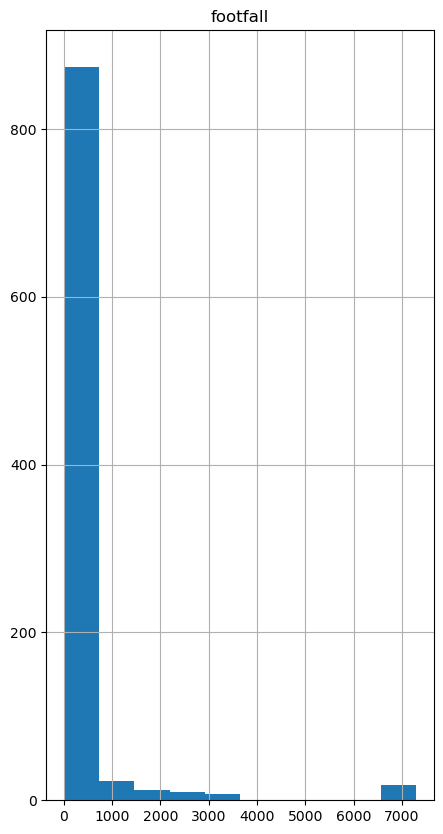

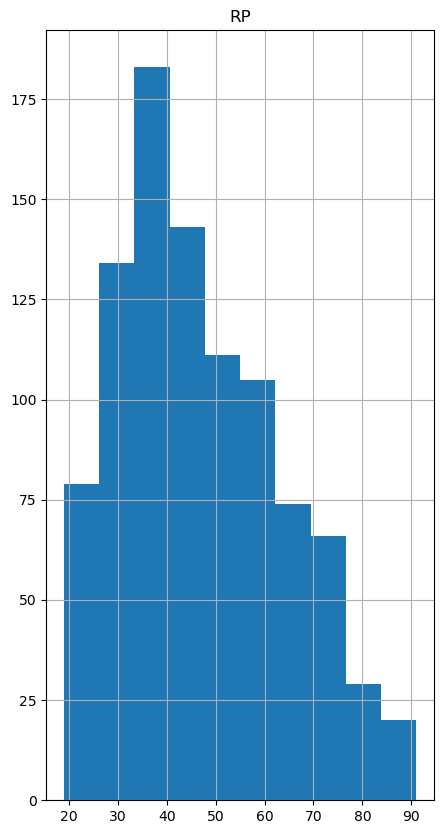

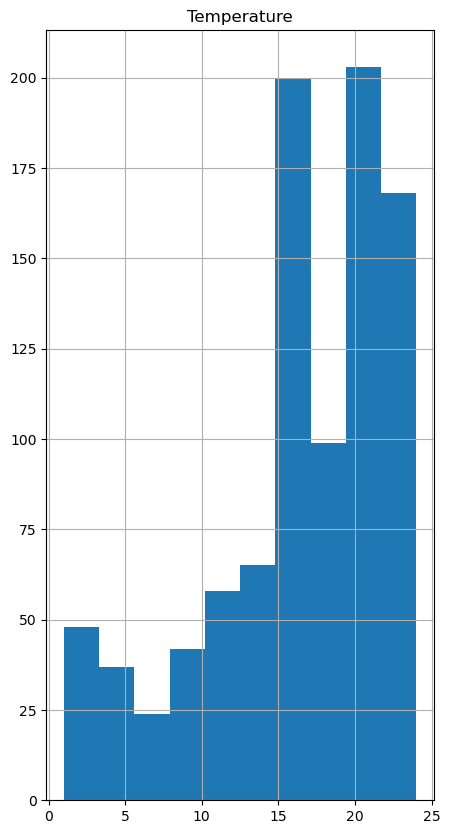

In [72]:
# Plotting graph for continous features with respect to target variable.

for feature in continuous_feature:
    plt.hist(df[feature])
    plt.title(feature)
    plt.grid()
    plt.show()

    

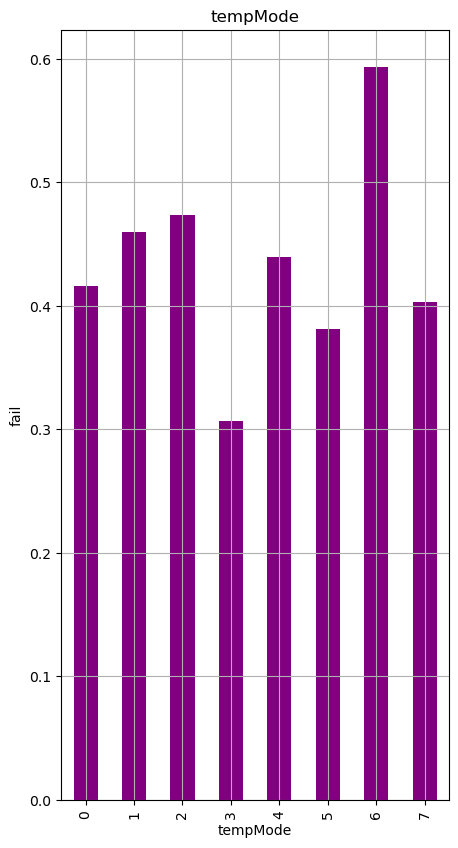

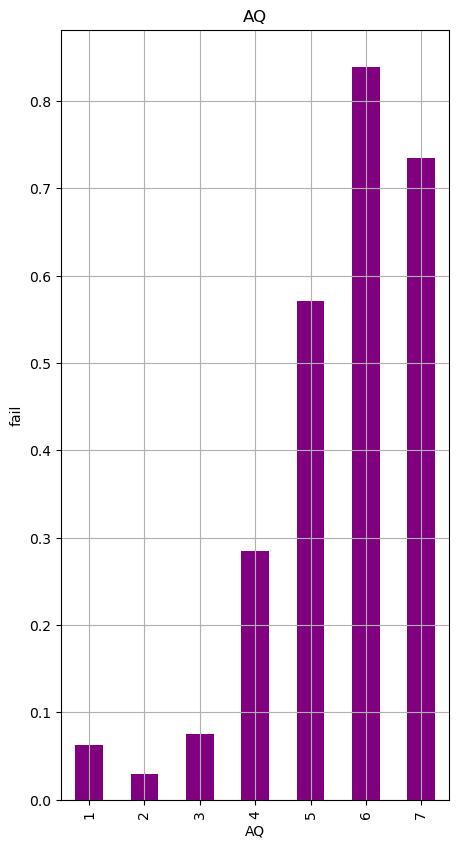

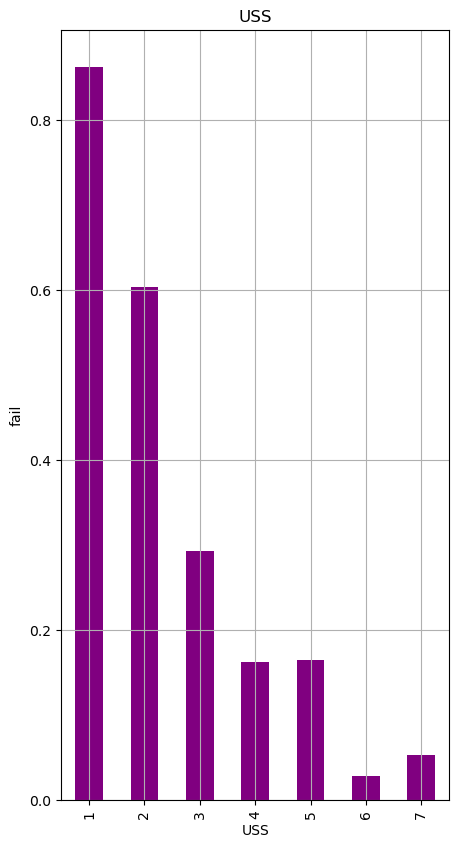

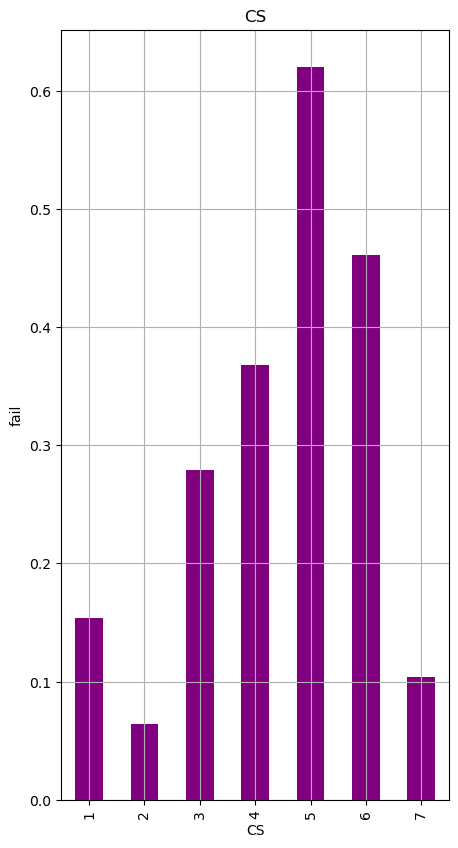

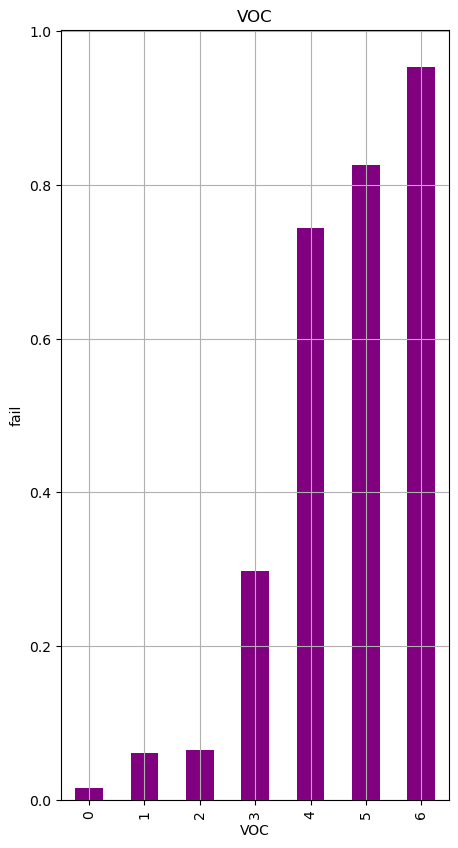

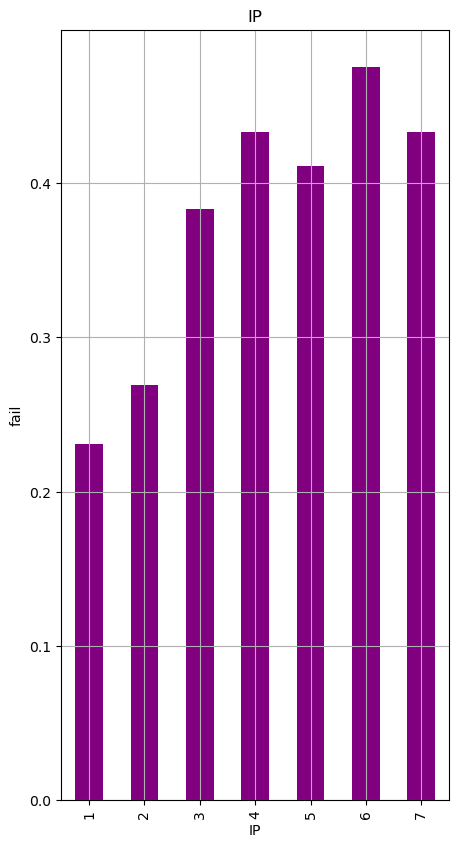

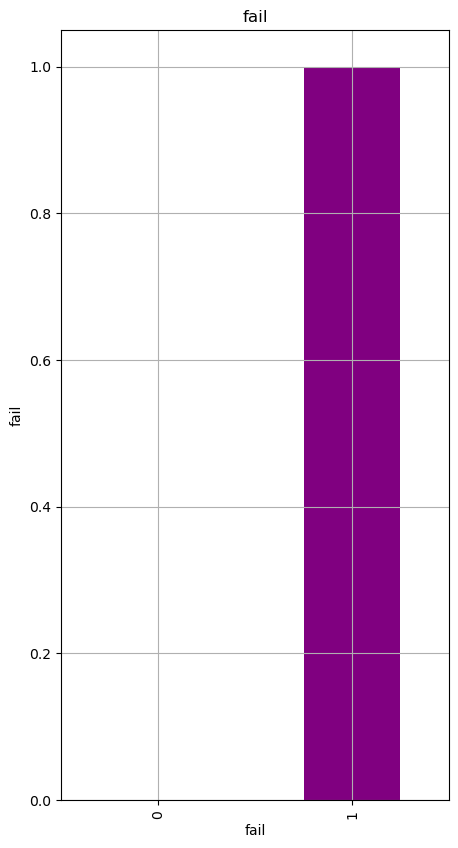

In [73]:
for feature in descreat_feature:
    df.groupby(feature)['fail'].mean().plot.bar(color='purple')
    plt.xlabel(feature)
    plt.ylabel('fail')
    plt.title(feature)
    plt.grid()
    plt.show()


In [74]:

df.groupby(df['tempMode'])['fail'].sum()


tempMode
0     67
1     46
2     53
3     31
4     29
5     32
6     19
7    116
Name: fail, dtype: int64

#### 5. Model Training, Evaluation and selection 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Splitting model into train and test data. 
df_train, df_test = train_test_split(df,test_size=0.2, random_state=20)

In [77]:
print(df_train.shape)
print(df_test.shape)

(755, 10)
(189, 10)


In [78]:
# splitting model furthrer in x and y varibles for train and test data. 

train_x = df_train.iloc[:,:-1]
train_y = df_train.iloc[:,-1]
test_x= df_test.iloc[:,:-1]
test_y = df_test.iloc[:,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(755, 9)
(755,)
(189, 9)
(189,)


#### Logistic Regression 

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [81]:
# Model learning and prediction

lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)
y_pred

C:\Users\himan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [82]:
# Checking possibility of oversampling 

df.fail.value_counts()
# here we can see there is not much class imbalance. 

fail
0    551
1    393
Name: count, dtype: int64

Oversampling is a technique used in data analysis and machine learning to address class imbalance in a dataset. Class imbalance occurs when the number of instances in one class is significantly higher or lower than in other classes, which can bias the model towards the majority class.

Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This can be achieved through various methods, such as:

Random Oversampling:

Randomly duplicate instances from the minority class until the desired balance is achieved.
SMOTE (Synthetic Minority Over-sampling Technique):

Generate synthetic instances by interpolating between existing minority class instances. This helps create more diverse and realistic samples compared to simple duplication.
ADASYN (Adaptive Synthetic Sampling):

Similar to SMOTE, but focuses on generating synthetic instances in regions where the minority class is sparse, thereby improving the classifier's decision boundary.

[[103   5]
 [ 11  70]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       108
           1       0.93      0.86      0.90        81

    accuracy                           0.92       189
   macro avg       0.92      0.91      0.91       189
weighted avg       0.92      0.92      0.91       189

--------------------------------------------------


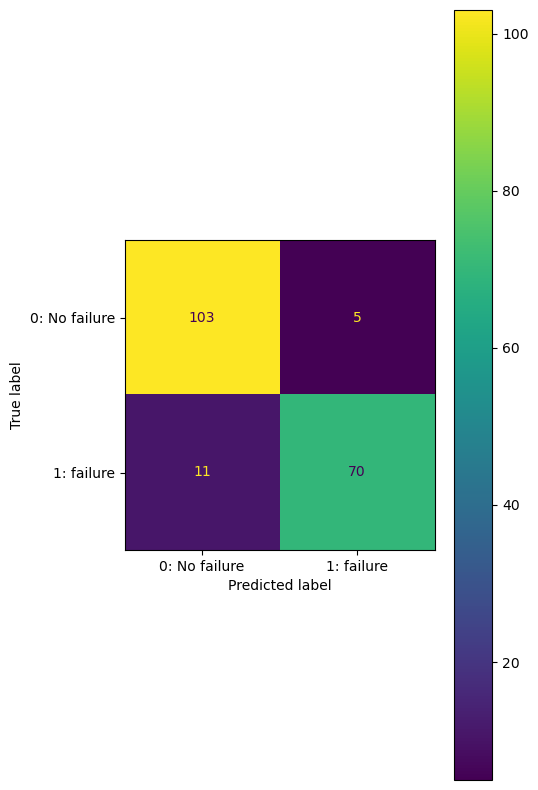

In [83]:
tab = confusion_matrix(test_y,y_pred)
print(tab)

print('-'*50)

print(classification_report(test_y,y_pred))
print('-'*50)
confusion_Display = ConfusionMatrixDisplay(tab,display_labels = ['0: No failure','1: failure'])
confusion_Display.plot()

# saving info for logistic regression. 
Log_reg_conf_matrix = tab
Log_reg_clss_rep = classification_report(test_y,y_pred)

- here we can see model is performing good, giving accuracy score = 92%
- from confusion matrix graph we can clearly see that model is predicting 11 machine failures as no failure so that we can say there is scope to make 
our model better performing 
- precision_score is also good --> 0.9333333333333333  Higher the precision better the model. 
- recall is also good --> 0.8641975308641975 Higher the recall better the model. 
- f1 score is ---> 0.8974358974358974.

In [84]:
# importing roc curve. 

from sklearn.metrics import roc_curve, roc_auc_score

In [85]:
pred_prob = lr.predict_proba(test_x)
print(pred_prob)
roc_auc_score(test_y, pred_prob[:,1])
FPR, TPR, Threshold = roc_curve(test_y, pred_prob[:,1])

[[8.12449587e-01 1.87550413e-01]
 [9.93216454e-01 6.78354634e-03]
 [2.87676180e-02 9.71232382e-01]
 [9.86789147e-01 1.32108528e-02]
 [2.31609512e-01 7.68390488e-01]
 [1.25671870e-02 9.87432813e-01]
 [7.01843268e-01 2.98156732e-01]
 [6.89452415e-01 3.10547585e-01]
 [9.99207806e-01 7.92193992e-04]
 [9.84622258e-01 1.53777424e-02]
 [9.71820758e-01 2.81792424e-02]
 [1.78241106e-01 8.21758894e-01]
 [9.74369622e-01 2.56303780e-02]
 [2.33772858e-01 7.66227142e-01]
 [9.03156322e-01 9.68436778e-02]
 [4.02741262e-02 9.59725874e-01]
 [2.84582834e-02 9.71541717e-01]
 [3.02947844e-01 6.97052156e-01]
 [2.99736121e-02 9.70026388e-01]
 [9.91894114e-01 8.10588649e-03]
 [9.96428840e-01 3.57115955e-03]
 [4.34962419e-02 9.56503758e-01]
 [4.64439182e-01 5.35560818e-01]
 [8.09241469e-01 1.90758531e-01]
 [9.81266409e-01 1.87335906e-02]
 [4.17082917e-01 5.82917083e-01]
 [2.33731404e-02 9.76626860e-01]
 [2.72276569e-01 7.27723431e-01]
 [9.94825211e-01 5.17478939e-03]
 [9.90438296e-01 9.56170356e-03]
 [9.516488

Text(0.5, 1.0, 'AUROC Curve ')

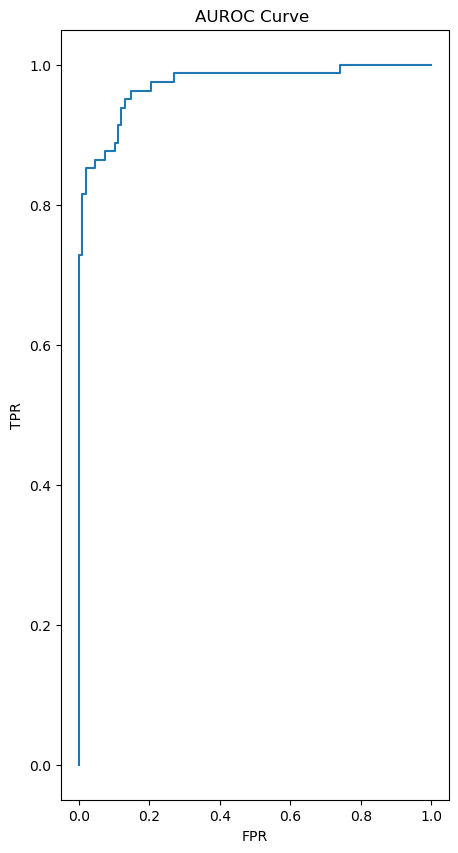

In [86]:
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AUROC Curve ")

##### Feature selection 

-  chi square test to do feature selection 
-  chi square test with X and Y
- chi-square --> Ho (there is no relatino between 2 veriables)
- chi-square --> H1 (there is a relation between 2 veriables)

In [87]:
df_x = df.iloc[:,:-1]
df_y = df.iloc[:,-1]

In [88]:
from scipy.stats import chi2_contingency

In [89]:


pVal_list = []
for col in df_x.columns:
    tab1 = pd.crosstab(df_x[col], df_y)
    pValue = chi2_contingency(tab1)[1]
    pVal_list.append(pValue)

pVal_list

# P value < 0.05 will reject the null
# p Value > 0.05 failed to reject the null (accept the null.)

[0.0319350291718991,
 0.0944541117885136,
 5.83593557051127e-73,
 2.0368031511738562e-49,
 8.960170766593511e-21,
 2.231251441194504e-134,
 0.1851082004436135,
 0.08018392803605061,
 0.0025374371687222007]

In [90]:
feature_imp = pd.DataFrame()

feature_imp['feature'] = df_x.columns
feature_imp['pValue'] = pVal_list

feature_imp[feature_imp.pValue <= 0.05]

# important features list we can see below. 

,feature,pValue
0,footfall,3.193503e-02
2,AQ,5.835936e-73
3,USS,2.036803e-49
4,CS,8.960171e-21
5,VOC,2.231251e-134
8,Temperature,2.537437e-03


In [91]:
# creating new dataframe having important features only.

l1 = list(feature_imp[feature_imp.pValue < .05].feature)
l1.append('fail')
df2= df.loc[:,l1]
df2

,footfall,AQ,USS,CS,VOC,Temperature,fail
0,0,7,1,6,6,1,1
1,190,3,3,5,1,1,0
2,31,2,2,6,1,1,0
3,83,3,4,5,1,1,0
4,640,5,6,4,0,1,0
...,...,...,...,...,...,...,...
939,0,7,1,6,4,24,1
940,0,5,2,6,6,24,1
941,0,6,2,7,5,24,1
942,0,6,2,5,6,24,1


- We can see above features (6/9) are significant, we can create a model with this features only and will see the reasults we are getting are best
or not than previous model. 

In [92]:
# Splitting data into to train and test.

df2_train, df2_test = train_test_split(df2,test_size=0.2, random_state=20)

train_x = df2_train.iloc[:,:-1]
train_y = df2_train.iloc[:,-1]
test_x = df2_test.iloc[:,:-1]
test_y = df2_test.iloc[:,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(755, 6)
(755,)
(189, 6)
(189,)


In [93]:
# Model train and prediction. 

lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)

y_pred

C:\Users\himan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [94]:
# Confusion matrix after feature selection. 

confusion_matrix(test_y,y_pred)

# Old Confusion Matrix : 
# [[103   5]
#  [ 11  70]]



array([[102,   6],
       [ 10,  71]], dtype=int64)

- From this we can see little difference in Fn column but its not making big difference. 
- we can say that even after feature selection there is no big/ significant difference we can see. 

In [95]:
print(classification_report(test_y,y_pred))


# Old Classificaiton report 

# precision    recall  f1-score   support

#            0       0.90      0.95      0.93       108
#            1       0.93      0.86      0.90        81

#     accuracy                           0.92       189
#    macro avg       0.92      0.91      0.91       189
# weighted avg       0.92      0.92      0.91       189

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.92      0.88      0.90        81

    accuracy                           0.92       189
   macro avg       0.92      0.91      0.91       189
weighted avg       0.92      0.92      0.92       189



- Here also we cant see any significant difference 

- from all this analysis we can say Logistic regression is giving us a good result, model is preforming well. 

### Decision Tree 



In [32]:
# Importing decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [33]:
df_train_dt, df_test_dt = train_test_split(df,test_size=0.2,random_state=20)

train_x_dt = df_train_dt.iloc[:,:-1]
train_y_dt = df_train_dt.iloc[:,-1]
test_x_dt = df_test_dt.iloc[:,:-1]
test_y_dt = df_test_dt.iloc[:,-1]

print(train_x_dt.shape)
print(train_y_dt.shape)
print(test_x_dt.shape)
print(test_y_dt.shape)

(755, 9)
(755,)
(189, 9)
(189,)


In [34]:
# Modle trainign and prediction. 

dt.fit(train_x_dt,train_y_dt)
y_pred_dt = dt.predict(test_x_dt)

y_pred_dt

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       108
           1       0.84      0.73      0.78        81

    accuracy                           0.83       189
   macro avg       0.83      0.81      0.82       189
weighted avg       0.83      0.83      0.82       189

----------------------------------------


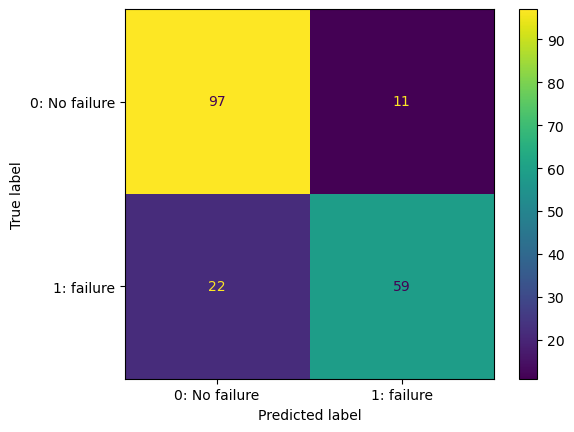

In [35]:
print(classification_report(test_y_dt,y_pred_dt))

print('-'*40)

tab_dt = confusion_matrix(test_y_dt,y_pred_dt)
ConfusionMatrixDisplay(tab_dt,display_labels = ['0: No failure','1: failure']).plot()



In [36]:
# dictionaruy creation. 

param_dict = {'criterion' : ['gini','entropy'],
             'max_depth': range(4,8)}

In [37]:
# Hyper parameter tuning --> Grid Search cv 

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dt,param_dict)

cv.fit(train_x_dt,train_y_dt)
cv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       108
           1       0.91      0.79      0.85        81

    accuracy                           0.88       189
   macro avg       0.89      0.87      0.87       189
weighted avg       0.88      0.88      0.88       189



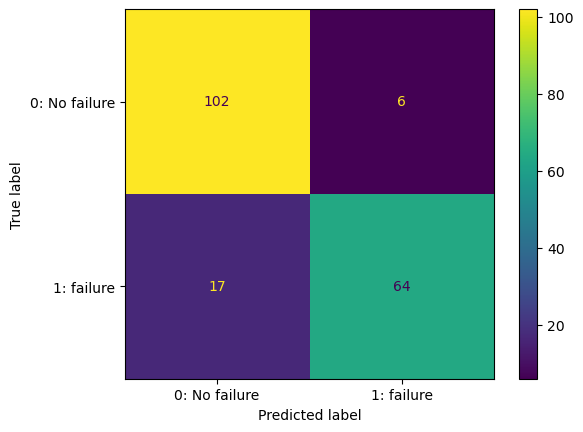

In [38]:
# Model training and prediction using grid searchcv. 

dtt = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
dtt.fit(train_x_dt,train_y_dt)
y_pred_dtt = dtt.predict(test_x_dt)


# Model performance 
print(classification_report(test_y_dt,y_pred_dtt))
tab_dt = confusion_matrix(test_y_dt,y_pred_dtt)
ConfusionMatrixDisplay(tab_dt,display_labels = ['0: No failure','1: failure']).plot()



# Saving info for further comparision. 
dt_conf_metrix = tab_dt
dt_class_report = (classification_report(test_y_dt,y_pred_dtt))

- Here we can  see accuracy is little less than logistic regression model. 
- for us Fn in more conserning so we are mainly focusing on Fn value. 

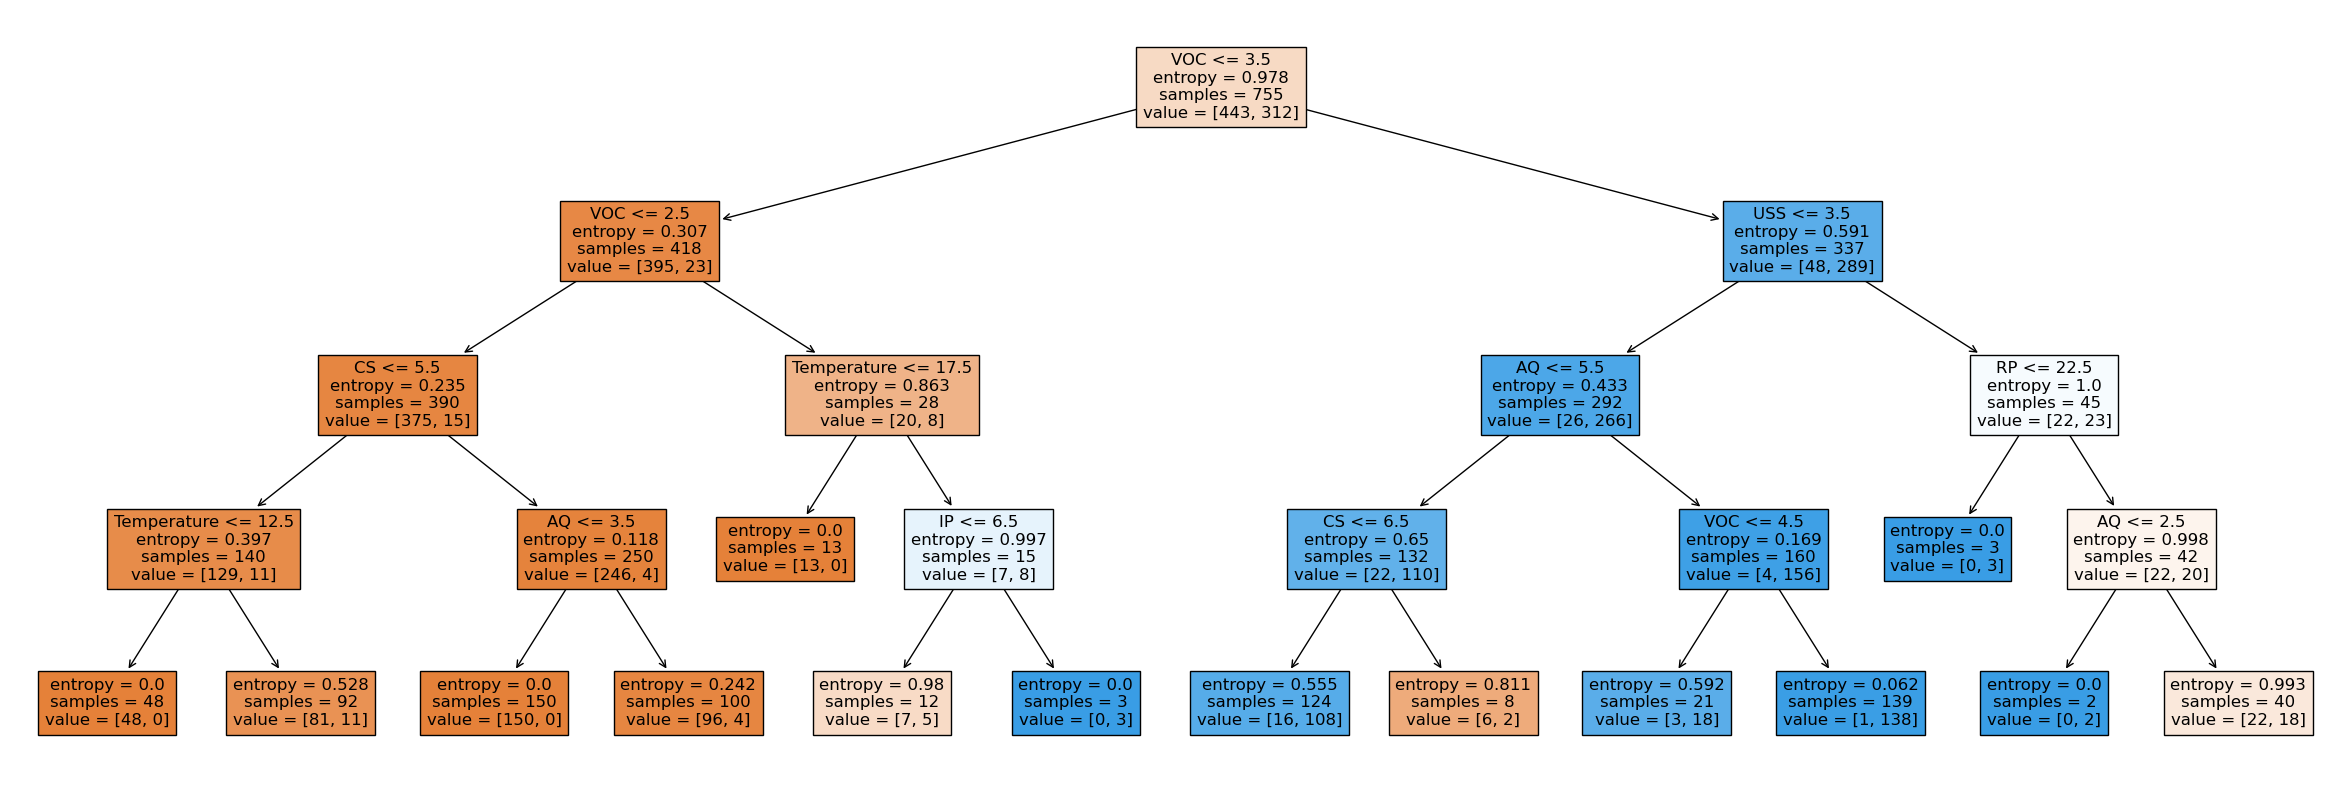

In [39]:
from sklearn.tree import plot_tree
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,10
plot_tree(dtt,filled=True,feature_names=train_x_dt.columns)
plt.show()


##### Feature selection

- this is normal feature selection technique.
- for Logistic regression we have used chi-square techinque

In [40]:
# dtt.feature_importances_

In [41]:
# train_x_dt.columns

In [42]:
# # dataframe created for important features

# feat_imp_dtt = pd.DataFrame()  # empyt data frame
# feat_imp_dtt['Feature'] = train_x_dt.columns  # adding feature columns in dataframe
# feat_imp_dtt['imp'] = dtt.feature_importances_  # adding values into dataframe in imp columns

# # checking highly impacting features. 

# feat_imp = feat_imp_dtt.sort_values('imp',ascending = False).head(6) # finding top 6 impacting records.
# l1 = list(feat_imp['Feature'][0:6])  # storing list of above feature in list l1
# l1.append('fail')  # adding fail column into list

# df2 = df.loc[:,l1]  # creating new dataframe with significant features. 
# df2  # now we have new dataframe with significant features only. 




In [43]:
# # splitting data. 

# df2_train_dt, df2_test_dt = train_test_split(df2,test_size=.2)

# train_x_dt = df2_train_dt.iloc[:,:-1]
# train_y_dt = df2_train_dt.iloc[:,-1]
# test_x_dt = df2_test_dt.iloc[:,:-1]
# test_y_dt = df2_test_dt.iloc[:,-1]

# print(train_x_dt.shape)
# print(train_y_dt.shape)
# print(test_x_dt.shape)
# print(test_y_dt.shape)


In [44]:
# # Model training and prediction using grid searchcv. 

# dtt1 = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
# dtt1.fit(train_x_dt,train_y_dt)
# y_pred_dtt = dtt1.predict(test_x_dt)


# # Model performance 
# print(classification_report(test_y_dt,y_pred_dtt))
# tab_dt = confusion_matrix(test_y_dt,y_pred_dtt)

# ConfusionMatrixDisplay(tab_dt,display_labels = ['0: No failure','1: failure']).plot()



# # Saving info for further comparision. 
# dt_conf_metrix = tab_dt
# dt_class_report = (classification_report(test_y_dt,y_pred_dtt))


- Sometimes this also happens that after feature selection model perform worst, in this case we can see that
- Please remove the code for feature selection to get best result.

#### Random Forest

In [50]:
df_train_rm,df_test_rm = train_test_split(df,test_size=0.2,random_state=20)

train_x = df_train_rm.iloc[:,:-1]
train_y = df_train_rm.iloc[:,-1]
test_x = df_test_rm.iloc[:,:-1]
test_y = df_test_rm.iloc[:,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(755, 9)
(755,)
(189, 9)
(189,)


[[103   5]
 [ 15  66]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       108
           1       0.94      0.83      0.88        81

    accuracy                           0.90       189
   macro avg       0.91      0.90      0.90       189
weighted avg       0.91      0.90      0.90       189



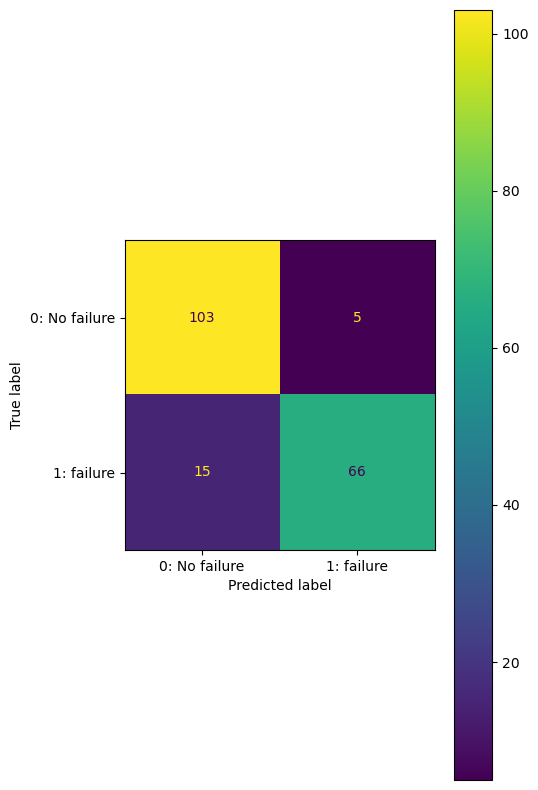

In [54]:
# importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RM = RandomForestClassifier(class_weight= 'balanced')

# model training and prediction
RM.fit(train_x,train_y)
y_pred_rm = RM.predict(test_x)

# Model performance 
tab_RM = confusion_matrix(test_y,y_pred)
print(tab_RM)
print('='* 50)

print(classification_report(test_y,y_pred_rm)) 
rcParams['figure.figsize'] = 5,10
ConfusionMatrixDisplay(tab_RM,display_labels = ['0: No failure','1: failure']).plot()



# Saving info for further comparision. 
RM_conf_metrix = tab_RM
RM_class_report = (classification_report(test_y,y_pred_rm))

In [55]:
## Compairing best algorithm

print("Logistic Algorithm")
print(Log_reg_conf_matrix)
print("\n",Log_reg_clss_rep)
print("-"*50)

print("Decision Tree Algorithm")
print(dt_conf_metrix)
print("\n",dt_class_report)
print("-"*50)


print("Random Forest Algorithm")
print(RM_conf_metrix)
print("\n",RM_class_report)
print("-"*50)

Logistic Algorithm
[[103   5]
 [ 11  70]]

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       108
           1       0.93      0.86      0.90        81

    accuracy                           0.92       189
   macro avg       0.92      0.91      0.91       189
weighted avg       0.92      0.92      0.91       189

--------------------------------------------------
Decision Tree Algorithm
[[102   6]
 [ 17  64]]

               precision    recall  f1-score   support

           0       0.86      0.94      0.90       108
           1       0.91      0.79      0.85        81

    accuracy                           0.88       189
   macro avg       0.89      0.87      0.87       189
weighted avg       0.88      0.88      0.88       189

--------------------------------------------------
Random Forest Algorithm
[[103   5]
 [ 15  66]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92    

- From above overall result we can say Logistic regression algorithm is best performing than others. 

## Pickling the Model

In [96]:
import pickle

In [97]:
pickle.dump(lr,open('regmodel.plk','wb'))

In [98]:
pickled_model = pickle.load(open('regmodel.plk','rb'))

In [99]:
pickled_model.predict(test_x)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)